/tmp/ipykernel_813282/3809958506.py:22: FutureWarning: `selem` is a deprecated argument name for `median`. It will be removed in version 1.0. Please use `footprint` instead.
  img_median = median(img, selem=np.ones((3, 3)))


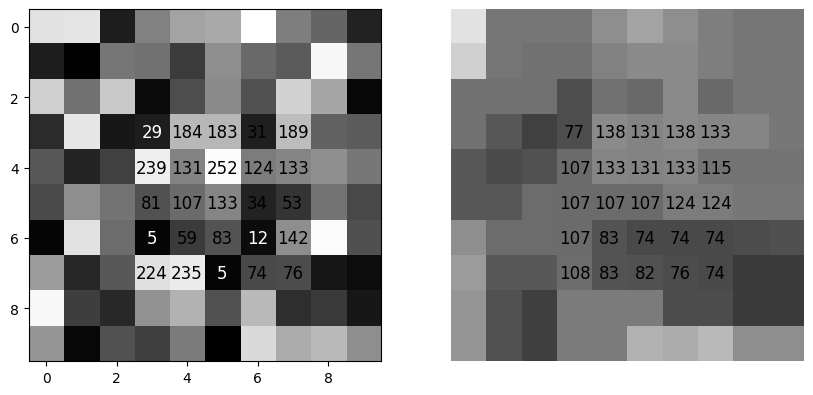

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters.rank import median

img_size = 10

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

np.random.seed(12345)
img = np.random.choice(range(255), (img_size, img_size)).astype(np.uint8)

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

for r in range(3, 8):
    for c in range(3, 8):
        clr = "white"
        if img[r, c] > 30:
            clr = "black"
        ax[0].text(c, r, str(img[r, c]), ha='center', va='center',
                 color=clr, fontsize=12)

img_median = median(img, selem=np.ones((3, 3)))

ax[1].imshow(img_median, cmap="gray", vmin=0, vmax=255)

for r in range(3, 8):
    for c in range(3, 8):
        clr = "white"
        if img_median[r, c] > 30:
            clr = "black"
        ax[1].text(c, r, str(img_median[r, c]), ha='center', va='center',
                 color=clr, fontsize=12)

plt.axis('off')
plt.show()


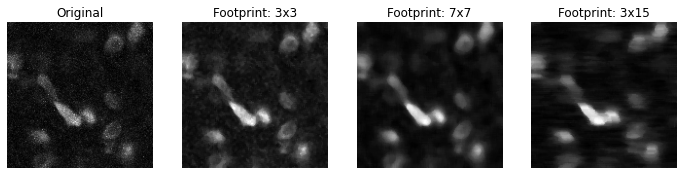

In [2]:
from skimage.io import imread
from skimage.filters.rank import median

img = imread("pitcells2.tif")
img = img[250:400, 200:350]
fig, ax = plt.subplots(1, 4, figsize = (12, 3))

ax[0].imshow(img, cmap = "gray")
img_median = median(img, selem=np.ones((3, 3)))
ax[1].imshow(img_median, cmap="gray")
img_median = median(img, selem=np.ones((7, 7)))
ax[2].imshow(img_median, cmap="gray")
img_median = median(img, selem=np.ones((3, 15)))
ax[3].imshow(img_median, cmap="gray")

titles = ["Original", "Footprint: 3x3", "Footprint: 7x7", "Footprint: 3x15"]
for a in ax:
    a.set_title(titles.pop(0))
    a.axis("off")

plt.show()


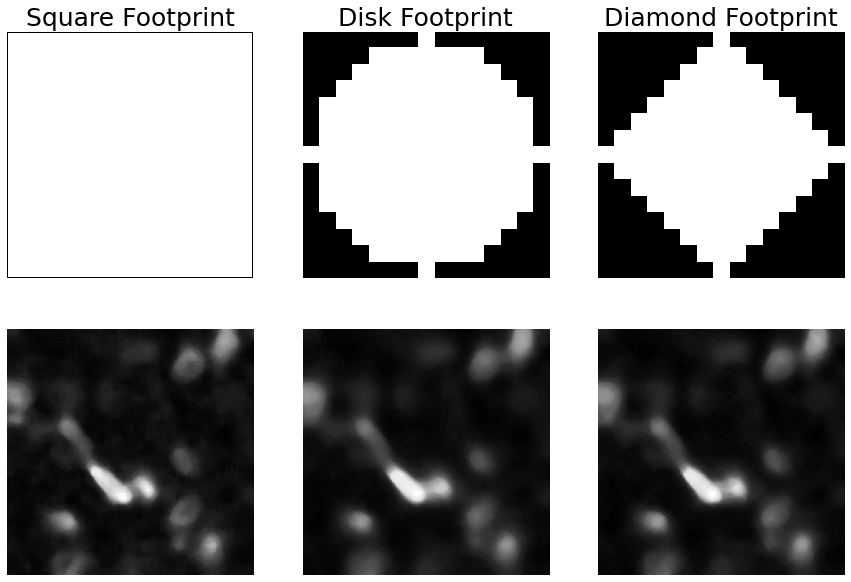

In [3]:
from skimage.morphology import disk, diamond
from matplotlib.patches import Rectangle

sq = np.ones((7,7)) # A square footprint with side 7
dsk = disk(7) # A disk footprint with radius 7
dia = diamond(7) # A diamond footprint with radius 7

img_sq = median(img, selem=sq)
img_disk = median(img, selem=dsk)
img_diamond = median(img, selem=dia)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0,0].imshow(sq, cmap="gray", vmin=0, vmax=1)
ax[0,1].imshow(dsk, cmap="gray")
ax[0,2].imshow(dia, cmap="gray")
ax[1,0].imshow(img_sq, cmap="gray")
ax[1,1].imshow(img_disk, cmap="gray")
ax[1,2].imshow(img_diamond, cmap="gray")

titles = ["Square Footprint", "Disk Footprint", "Diamond Footprint"]

for i in range(3):
    ax[0,i].set_title(titles[i], fontsize=25)

ax[0,0].add_patch(Rectangle((-0.5, -0.5), 6.95, 6.95, edgecolor="black", fill=False))
for a in ax.ravel():
    a.axis("off")

plt.show()

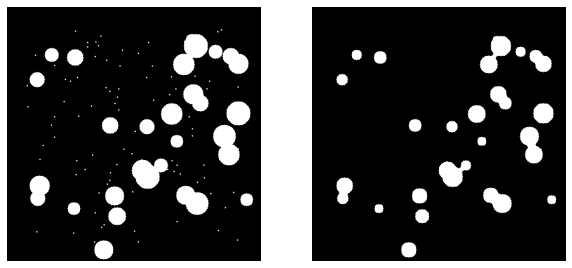

In [4]:
from skimage.filters.rank import minimum

img = np.zeros((400,400), dtype=np.uint8)
np.random.seed(12345)
num_cells = 30

for i in range(num_cells):
    cx, cy = np.random.choice(range(30, 370), 2)
    radius = np.random.choice(range(10, 20))
    img[cx:(cx+radius*2+1), cy:(cy+radius*2+1)] += disk(radius)

# Bright spots
num_spots = 100

for i in range(num_spots):
    cx, cy = np.random.choice(range(30, 370), 2)
    img[cx:(cx+2), cy:(cy+2)] = 1

img = np.clip(img, 0, 1)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(img, cmap='gray')
ax[1].imshow(minimum(img, selem=disk(3)), cmap='gray')

for a in ax:
    a.axis('off')

plt.show()

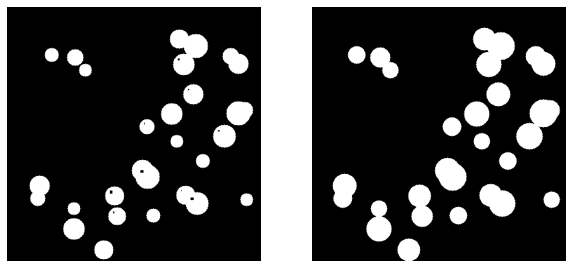

In [5]:
from skimage.filters.rank import maximum

img = np.zeros((400,400), dtype=np.uint8)
np.random.seed(12345)
num_cells = 30

for i in range(num_cells):
    cx, cy = np.random.choice(range(30, 370), 2)
    dia = np.random.choice(range(10, 20))
    img[cx:(cx+dia*2+1), cy:(cy+dia*2+1)] += disk(dia)
    if i % 3 == 0:
        spot_dia = np.random.choice(range(1, 5))
        img[(cx+dia//2):(cx+dia//2+spot_dia+1), (cy+radius//2):(cy+dia//2+spot_dia+1)] = 0

img = np.clip(img, 0, 1)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(img, cmap='gray')
ax[1].imshow(maximum(img, selem=disk(3)), cmap='gray')

for a in ax:
    a.axis('off')

plt.show()

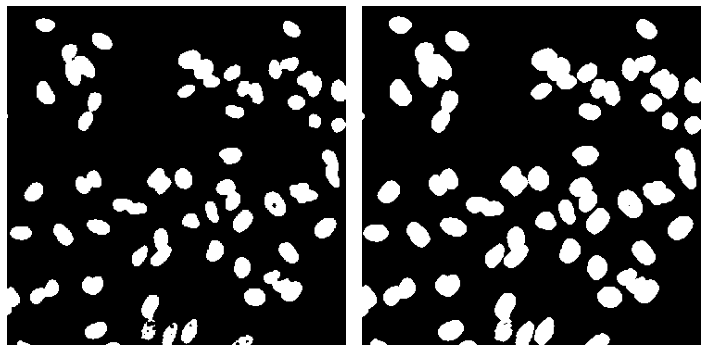

In [6]:
nuclei = imread("nuclei1.tif")
nuclei = nuclei > 150
nuclei = nuclei.astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(nuclei, cmap="gray")
ax[1].imshow(maximum(nuclei, selem = disk(2)), cmap="gray")

for a in ax:
    a.axis("off")

fig.tight_layout()

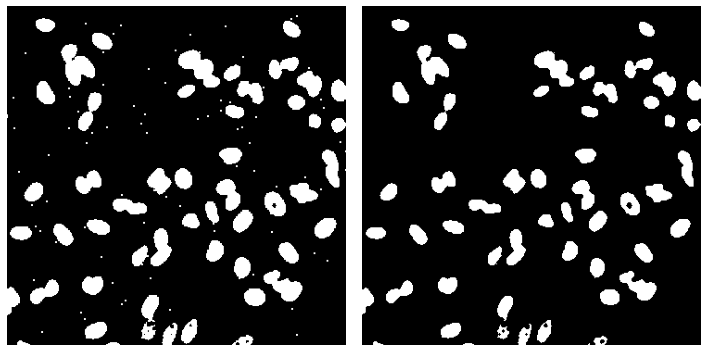

In [7]:
num_spots = 100

for i in range(num_spots):
    cx, cy = np.random.choice(range(5, 370), 2)
    nuclei[cx:(cx+2), cy:(cy+2)] = 1

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(nuclei, cmap="gray")
ax[1].imshow(minimum(nuclei, selem = disk(1)), cmap="gray")

for a in ax:
    a.axis("off")

fig.tight_layout()

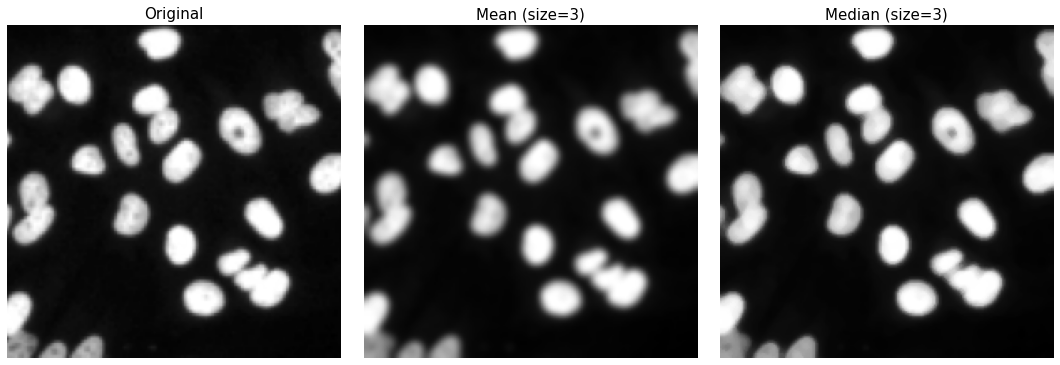

In [8]:
from skimage.filters.rank import mean, median
nuclei = imread("nuclei1.tif")
nuclei = nuclei[150:350, 150:350]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(nuclei, cmap="gray")
ax[0].set_title("Original", fontsize=15)
ax[1].imshow(mean(nuclei, disk(3)), cmap="gray")
ax[1].set_title("Mean (size=3)", fontsize=15)
ax[2].imshow(median(nuclei, disk(3)), cmap="gray")
ax[2].set_title("Median (size=3)", fontsize=15)

for a in ax:
    a.axis("off")

fig.tight_layout()
plt.show()

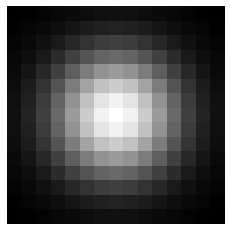

In [16]:
from skimage import img_as_ubyte

def gaussian(sigma, size):
    """
    Gaussian function.
    
    sigma: the standard deviation of the Gaussian function
    size: the size of the output image
    """
    img = np.zeros((size, size))

    sigma2 = sigma**2
    a = 1.0/(2.0*np.pi*sigma2)
    

    for x in range(size):
        for y in range(size):
            img[x, y] = a*np.exp(-((x-size/2)**2 + (y-size/2)**2)/(2*sigma2))

    return img/np.max(img)

img = img_as_ubyte(gaussian(3, 16))
plt.imshow(img[1:,1:], cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

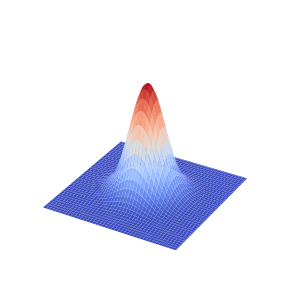

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (5, 5))

img_size = 128
X = range(-img_size//2, img_size//2)
Y = range(-img_size//2, img_size//2)
X, Y = np.meshgrid(X, Y)
Z = gaussian(15, img_size)

ax.plot_surface(X, Y, Z, linewidth = 0, antialiased = True, cmap="coolwarm")
ax.axis("off")
plt.show()

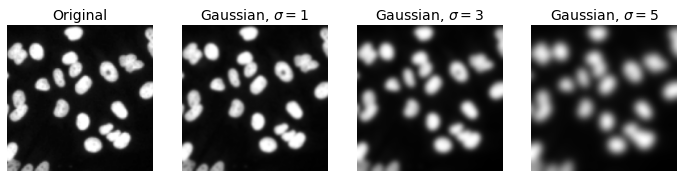

In [11]:
from skimage.filters import gaussian
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

ax[0].imshow(nuclei, cmap="gray")
ax[0].set_title("Original", fontsize=14)
ax[1].imshow(gaussian(nuclei, sigma=1), cmap="gray")
ax[1].set_title("Gaussian, $\sigma=1$", fontsize=14)
ax[2].imshow(gaussian(nuclei, sigma=3), cmap="gray")
ax[2].set_title("Gaussian, $\sigma=3$", fontsize=14)
ax[3].imshow(gaussian(nuclei, sigma=5), cmap="gray")
ax[3].set_title("Gaussian, $\sigma=5$", fontsize=14)

for a in ax:
    a.axis("off")

plt.show()

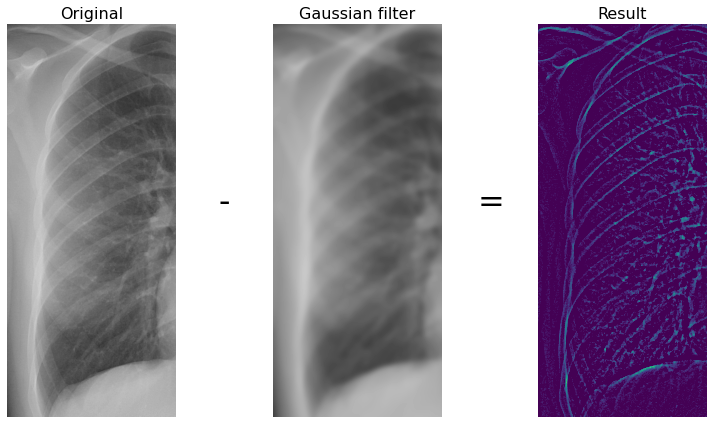

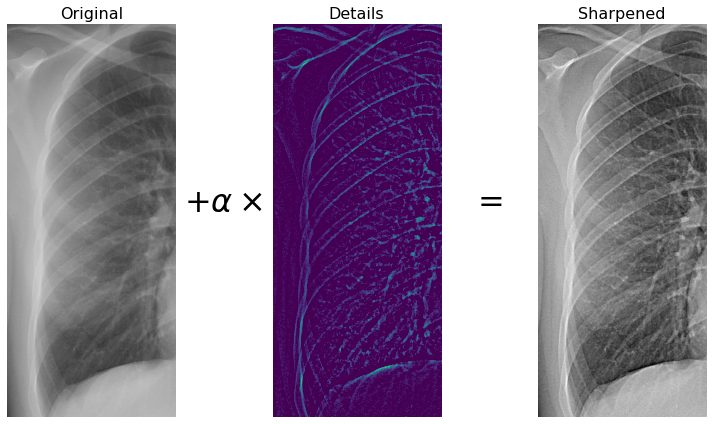

In [12]:
from skimage import img_as_float

fig, ax = plt.subplots(1, 3, figsize=(12, 6))

xray = imread("chest_xray.jpg")
xray = xray[250:2000,0:750,0]

xray = img_as_float(xray)
xray_blurred = gaussian(xray, sigma=11, preserve_range = True)
details = xray - xray_blurred

ax[0].imshow(xray, cmap='gray', vmin=0, vmax=1)
ax[0].set_title('Original', fontsize=16)
ax[1].imshow(xray_blurred, cmap='gray', vmin=0, vmax=1)
ax[1].set_title('Gaussian filter', fontsize=16)
ax[2].imshow(details, cmap='viridis', vmin=0)
ax[2].set_title('Result', fontsize=16)

fig.text(.34, .5, "-", fontsize=32)
fig.text(.64, .5, "=", fontsize=32)

for a in ax:
    a.axis('off')

plt.tight_layout()

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(xray, cmap='gray', vmin=0, vmax=1)
ax[0].set_title('Original', fontsize=16)
ax[1].imshow(details, cmap='viridis', vmin=0)
ax[1].set_title('Details', fontsize=16)
ax[2].imshow(xray + 2*details, cmap='gray', vmin=0, vmax=1)
ax[2].set_title('Sharpened', fontsize=16)

fig.text(.3, .5, r"+$\alpha\times$", fontsize=32)
fig.text(.64, .5, "=", fontsize=32)

for a in ax:
    a.axis('off')

plt.tight_layout()

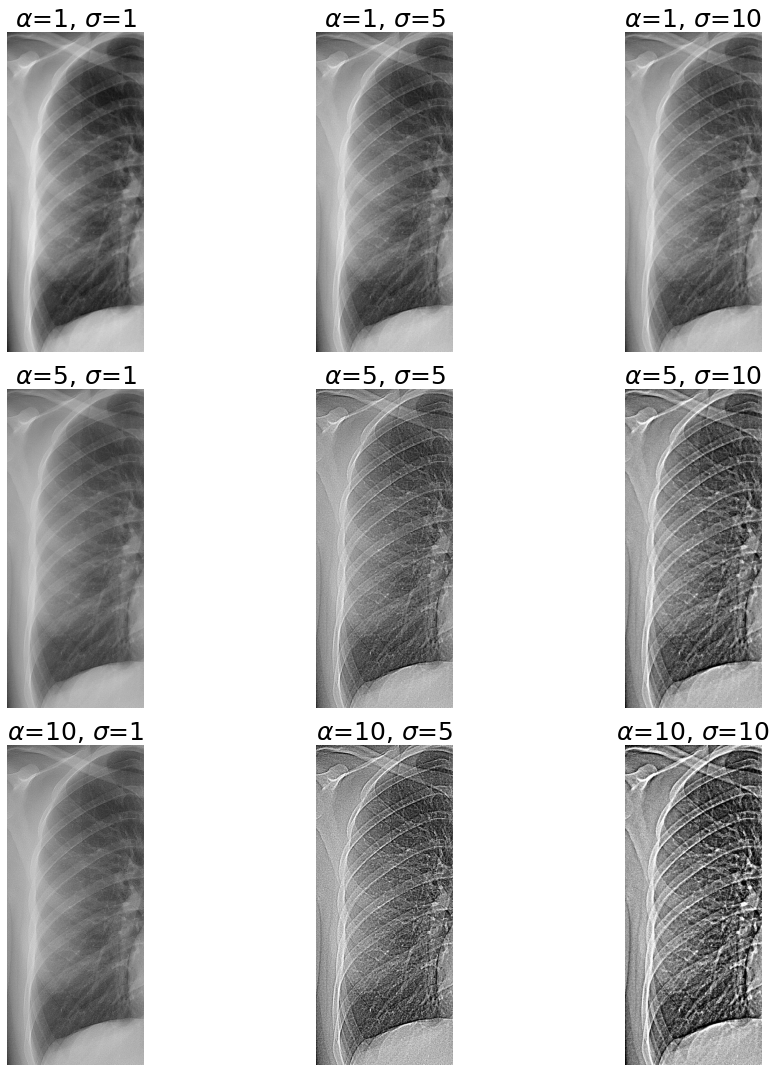

In [13]:
from skimage.filters import unsharp_mask
sigma = [1, 5, 10]
alpha = [1, 5, 10]

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for a in alpha:
    for s in sigma:
        ax[alpha.index(a), sigma.index(s)].imshow(unsharp_mask(xray, s, a), cmap='gray')
        ax[alpha.index(a), sigma.index(s)].set_title(fr'$\alpha$={a}, $\sigma$={s}', fontsize=25)
        ax[alpha.index(a), sigma.index(s)].axis('off')

plt.tight_layout()

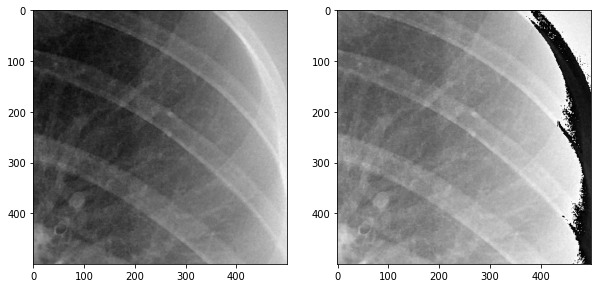

In [14]:
from skimage.filters.edges import convolve
xray = imread("chest_xray.jpg")
xray = xray[500:1000,1250:1750,0]

kernel = np.array([[0,0,0], [0,1.5,0], [0,0,0]])

xray2 = convolve(xray, kernel, mode='mirror')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(xray, cmap="gray")
ax[1].imshow(xray2, cmap="gray")

plt.show()


In [15]:
im1 = np.array(range(16)).reshape(4, 4)
im2 = np.array(range(16, 32)).reshape(4, 4)

print(convolve(im1, kernel, mode="constant") + convolve(im2, kernel, mode="constant"))
print(convolve(im1+im2, kernel, mode="constant"))



[[24 26 30 32]
 [36 38 42 44]
 [48 50 54 56]
 [60 62 66 68]]
[[24 27 30 33]
 [36 39 42 45]
 [48 51 54 57]
 [60 63 66 69]]


[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255   0]
 [255 255 255 255 255 255 128 128 128 128 128 128 128 128 128 255 255 255
  255 255]
 [255 255 255 255 255 128 128 128 128 128 128 128 128 128 128 128 255 255
  255 255]
 [255 255 255 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
  255 255]
 [255 255 255 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
  255 255]
 [255 255 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
  128 255]
 [255 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
  128 128]
 [255 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
  128 128]
 [255 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
  128 128]
 [255 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
  128 128]
 [255 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
  128 128]
 [255 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128

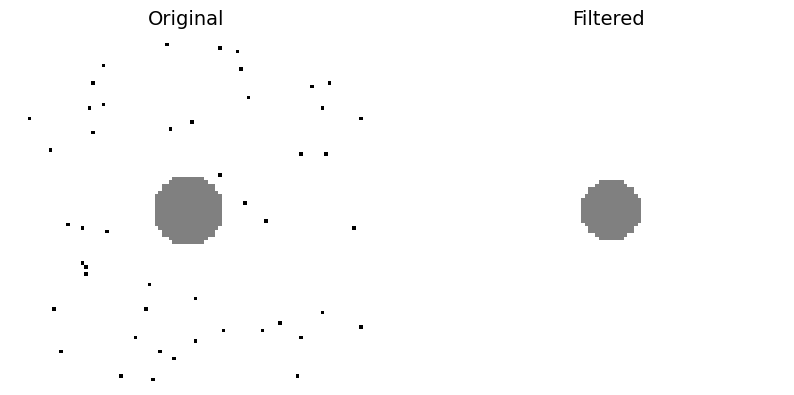

In [41]:
from skimage import img_as_ubyte

img = np.zeros((100, 100))

# Add some random speckles
n_speckles = 50

for i in range(n_speckles):
    x = np.random.randint(0, 100)
    y = np.random.randint(0, 100)
    img[x, y] = 1

# Add a circle of radius 10
x, y = np.ogrid[:100, :100]
mask = (x - 50)**2 + (y - 50)**2 < 10**2
img[mask] = 0.5

img = 1-img
img = img_as_ubyte(img)
# Apply a 3x3 max filter
from skimage.filters.rank import maximum

img_max = maximum(img, np.ones((3, 3)))

print(img[40:60,40:60])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap="gray", vmin=0, vmax=255)
ax[1].imshow(img_max, cmap="gray", vmin=0, vmax=255)
ax[0].axis("off")
ax[1].axis("off")
ax[0].set_title("Original", fontsize=14)
ax[1].set_title("Filtered", fontsize=14)
plt.show()
